A used car sales service called “No Accidents, No Repaint” is developing an application to attract new customers. The app allows users to quickly find out the market value of their car. You are provided with historical data that includes technical specifications, configurations, and prices of cars. Your task is to build a model to predict car prices.

The client cares about:

 - prediction quality;
 - prediction speed;
 - training time.

# 1. Data Preparation

In [1]:
import pandas as pd
df = pd.read_csv('/Users/fidanb/Downloads/yandex praktikum/all datasets/autos.csv')
df

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


In [91]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [92]:
df['VehicleType'].value_counts()

sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64

In [93]:
df['Gearbox'].value_counts()

manual    268251
auto       66285
Name: Gearbox, dtype: int64

In [94]:
df['Model'].value_counts()

golf                  29232
other                 24421
3er                   19761
polo                  13066
corsa                 12570
                      ...  
serie_2                   8
rangerover                4
serie_3                   4
serie_1                   2
range_rover_evoque        2
Name: Model, Length: 250, dtype: int64

In [95]:
df.query('Price == 0.0')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
40,2016-03-26 22:06:17,0,NaN,1990,NaN,0,corsa,150000,1,petrol,opel,NaN,2016-03-26 00:00:00,0,56412,2016-03-27 17:43:34
111,2016-03-19 18:40:12,0,NaN,2017,manual,0,golf,5000,12,petrol,volkswagen,NaN,2016-03-19 00:00:00,0,21698,2016-04-01 08:47:05
115,2016-03-20 18:53:27,0,small,1999,NaN,0,NaN,5000,0,petrol,volkswagen,NaN,2016-03-20 00:00:00,0,37520,2016-04-07 02:45:22
152,2016-03-11 18:55:53,0,bus,2004,manual,101,meriva,150000,10,lpg,opel,yes,2016-03-11 00:00:00,0,27432,2016-03-12 23:47:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354205,2016-03-09 15:56:30,0,NaN,2000,manual,65,corsa,150000,0,NaN,opel,yes,2016-03-09 00:00:00,0,23758,2016-03-30 11:16:08
354238,2016-03-20 14:55:07,0,small,2002,manual,60,fiesta,150000,3,petrol,ford,NaN,2016-03-20 00:00:00,0,33659,2016-04-06 18:45:23
354248,2016-03-24 13:48:05,0,small,1999,manual,53,swift,150000,3,petrol,suzuki,NaN,2016-03-24 00:00:00,0,42329,2016-04-07 05:17:24
354277,2016-03-10 22:55:50,0,small,1999,manual,37,arosa,150000,7,petrol,seat,yes,2016-03-10 00:00:00,0,22559,2016-03-12 23:46:32


##### I extracted the rows where the "Price" column equals 0; there were about 11 thousand rows, which seems absurd. I wasn’t sure whether they should be removed, so I decided to leave them as they are.

In [96]:
df_price = df.query('Price == 0.0')
mis_val_percent = 100 * len(df_price) / len(df)
mis_val_percent 

3.0397692800442475

In [97]:
data = df.query('Price != 0.0')
data 

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354363,2016-03-27 20:36:20,1150,bus,2000,manual,0,zafira,150000,3,petrol,opel,no,2016-03-27 00:00:00,0,26624,2016-03-29 10:17:23
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


# 2. Model Training

In [98]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.model_selection import train_test_split
import time
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [99]:
df_new = data.copy()

In [100]:
# Удалила все ненужные столбцы:
df_new=df_new.drop(['DateCrawled','DateCreated','NumberOfPictures','LastSeen','PostalCode'],axis=1)
df_new

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...,...
354363,1150,bus,2000,manual,0,zafira,150000,3,petrol,opel,no
354365,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
354366,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no
354367,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no


In [101]:
from sklearn import preprocessing

In [102]:
# Заполнила все пропуски в категиральные столбцах на "None":
df_new.fillna('None', inplace=True)

In [103]:
#df_new.query('VehicleType == "None"')

In [104]:
from sklearn.preprocessing import OrdinalEncoder

In [105]:
encoder = OrdinalEncoder()

In [106]:
data_ordinal = pd.DataFrame(encoder.fit_transform(df_new),
                            columns=df_new.columns)

In [107]:
data_ordinal

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
0,255.0,0.0,80.0,2.0,0.0,117.0,12.0,0.0,7.0,38.0,0.0
1,3586.0,3.0,98.0,2.0,190.0,26.0,11.0,5.0,3.0,1.0,2.0
2,2589.0,7.0,91.0,1.0,163.0,118.0,11.0,8.0,3.0,14.0,0.0
3,695.0,6.0,88.0,2.0,75.0,117.0,12.0,6.0,7.0,38.0,1.0
4,1332.0,6.0,95.0,2.0,69.0,102.0,9.0,7.0,3.0,31.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
343592,549.0,1.0,87.0,2.0,0.0,250.0,12.0,3.0,7.0,24.0,1.0
343593,922.0,0.0,92.0,0.0,0.0,26.0,2.0,1.0,0.0,33.0,0.0
343594,567.0,2.0,87.0,1.0,101.0,107.0,11.0,3.0,7.0,32.0,1.0
343595,2491.0,1.0,83.0,2.0,102.0,225.0,12.0,3.0,3.0,38.0,1.0


In [108]:
y = data_ordinal['Price']
X = data_ordinal.drop('Price', axis=1)

In [109]:
# Разделила датасет на обучающую, валидационную и тестовую
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12345)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=12345)

In [110]:
print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)

(206157, 10) (68720, 10) (68720, 10) (206157,) (68720,) (68720,)


In [111]:
X_train

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
13727,5.0,82.0,2.0,150.0,32.0,12.0,10.0,7.0,1.0,1.0
178658,8.0,88.0,1.0,116.0,117.0,12.0,9.0,7.0,38.0,1.0
126204,8.0,92.0,2.0,140.0,171.0,12.0,12.0,3.0,38.0,1.0
74784,8.0,88.0,2.0,101.0,104.0,12.0,6.0,7.0,10.0,0.0
88634,1.0,89.0,2.0,0.0,250.0,12.0,9.0,7.0,24.0,2.0
...,...,...,...,...,...,...,...,...,...,...
262348,5.0,89.0,1.0,224.0,96.0,12.0,4.0,7.0,20.0,1.0
84090,3.0,84.0,2.0,170.0,26.0,12.0,5.0,7.0,2.0,1.0
65091,5.0,97.0,2.0,105.0,117.0,9.0,2.0,3.0,38.0,1.0
122296,5.0,87.0,2.0,102.0,34.0,12.0,8.0,5.0,20.0,0.0


### I decided to combine the training of the models into a single function and also remove repetitive parts of the code.

In [113]:
import timeit
def rmse(model_type, x_train, y_train, x_valid, y_valid):
    if model_type == "xgb":
        model = xgb.XGBRegressor(learning_rate = 1, max_depth = 5, n_estimators = 40,silent=True)
    if model_type == "lgb":
        model = lgb.LGBMRegressor(num_leaves=31,learning_rate=1, n_estimators=40)
    if model_type == "cat":
        model = CatBoostRegressor(iterations=200,loss_function='RMSE',task_type="CPU",learning_rate=1,depth=5,verbose=40)
    if model_type == "decision":
        model = DecisionTreeRegressor(max_depth = 5,max_features=5, random_state=12345)
    start1 = timeit.default_timer()
    model.fit(X_train, y_train)
    stop1 = timeit.default_timer()
    print(f"Fitting time {stop1 - start1}")
    
    start2 = timeit.default_timer()
    y_pred = model.predict(X_valid) 
    stop2 = timeit.default_timer()
    print(f"Prediction time {stop2 - start2}")
    
    RMSE = mean_squared_error(y_valid, y_pred) ** 0.5
    return {f"RMSE_{model_type}": RMSE}

In [114]:
RMSEs_xgb = rmse("xgb",X_train,y_train,X_valid, y_valid)
RMSEs_xgb

Fitting time 8.39443482644856
Prediction time 0.17520733550190926


{'RMSE_xgb': 370.93958071885163}

In [115]:
RMSEs_lgb = rmse("lgb",X_train,y_train,X_valid, y_valid)
RMSEs_lgb

Fitting time 1.0685774916782975
Prediction time 0.176610404625535


{'RMSE_lgb': 371.9583265898963}

In [116]:
RMSEs_cat = rmse("cat",X_train,y_train,X_valid, y_valid)
RMSEs_cat

0:	learn: 586.5514632	total: 44.1ms	remaining: 8.78s
40:	learn: 373.4642883	total: 5.37s	remaining: 20.8s
80:	learn: 357.4387240	total: 10.6s	remaining: 15.6s
120:	learn: 348.2779871	total: 15.9s	remaining: 10.4s
160:	learn: 341.5824665	total: 21.1s	remaining: 5.12s
199:	learn: 336.3160262	total: 26.3s	remaining: 0us
Fitting time 29.90260362904519
Prediction time 0.013941262848675251


{'RMSE_cat': 351.26777219207935}

In [117]:
RMSEs_decision = rmse("decision",X_train,y_train,X_valid, y_valid)
RMSEs_decision

Fitting time 0.17460844200104475
Prediction time 0.00584523007273674


{'RMSE_decision': 552.8992898781136}

### I kept hyperparameter tuning using the GridSearchCV method

In [118]:
from sklearn.model_selection import GridSearchCV

#### LGBMRegressor()

In [119]:
estimator = lgb.LGBMRegressor(num_leaves=31)

In [120]:
param_grid = {
             'learning_rate': [0.1, 1],
             'n_estimators': [20, 40]
              }

In [121]:
gbm = GridSearchCV(estimator, param_grid, cv=3)

In [122]:
%%time
gbm.fit(X_train, y_train)

CPU times: user 11.8 s, sys: 0 ns, total: 11.8 s
Wall time: 12.1 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 1], 'n_estimators': [20, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sc

In [123]:
print('Best parameters found by grid search is:', gbm.best_params_)

Best parameters found by grid search is: {'learning_rate': 1, 'n_estimators': 40}


In [124]:
%%time
y_predic = gbm.predict(X_valid) 

CPU times: user 176 ms, sys: 0 ns, total: 176 ms
Wall time: 192 ms


In [125]:
rmse_Lgb = mean_squared_error(y_valid, y_predic) ** 0.5
rmse_Lgb

371.9583265898963

#### DecisionTreeRegressor()

In [126]:
from sklearn.tree import DecisionTreeRegressor

In [127]:
param_grid = [
    {'max_depth': [3, 5, 10],
     'max_features': [3, 4, 5]}
]

In [128]:
model = DecisionTreeRegressor(random_state=12345)
grid_search = GridSearchCV(model, param_grid, cv=5)

In [129]:
%%time
grid_search.fit(X_train, y_train)

CPU times: user 6.38 s, sys: 0 ns, total: 6.38 s
Wall time: 6.39 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=12345,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [3, 5, 10], 'max_features': [3, 4, 5]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [130]:
print('Best parameters found by grid search is:',grid_search.best_params_)

Best parameters found by grid search is: {'max_depth': 10, 'max_features': 5}


In [131]:
%%time
y_predic = grid_search.predict(X_valid) 

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 10.9 ms


In [132]:
GR_rmse = mean_squared_error(y_valid, y_predic) ** 0.5
GR_rmse

453.37877542474195

#### CatBoostRegressor()

In [133]:
model = CatBoostRegressor()
parameters = {'depth'         : [3,5],
              'learning_rate' : [1],
              'iterations'    : [150,200]
                 }

In [134]:
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2)

In [135]:
%%time
grid.fit(X_train, y_train,verbose=10)

0:	learn: 638.1382979	total: 40.4ms	remaining: 6.01s
10:	learn: 454.2634119	total: 625ms	remaining: 7.89s
20:	learn: 418.3013075	total: 1.3s	remaining: 7.96s
30:	learn: 405.0253025	total: 1.88s	remaining: 7.22s
40:	learn: 396.2713602	total: 2.46s	remaining: 6.55s
50:	learn: 390.3964753	total: 3.05s	remaining: 5.92s
60:	learn: 384.8726805	total: 3.64s	remaining: 5.3s
70:	learn: 380.9161057	total: 4.22s	remaining: 4.69s
80:	learn: 376.5546971	total: 4.8s	remaining: 4.09s
90:	learn: 373.6308019	total: 5.38s	remaining: 3.49s
100:	learn: 371.1887892	total: 5.97s	remaining: 2.9s
110:	learn: 368.9980593	total: 6.55s	remaining: 2.3s
120:	learn: 367.2076433	total: 7.13s	remaining: 1.71s
130:	learn: 365.5628159	total: 7.71s	remaining: 1.12s
140:	learn: 363.7821954	total: 8.3s	remaining: 530ms
149:	learn: 362.1145742	total: 8.88s	remaining: 0us
0:	learn: 639.7902401	total: 62.8ms	remaining: 9.36s
10:	learn: 452.9464215	total: 649ms	remaining: 8.2s
20:	learn: 421.0892321	total: 1.23s	remaining: 7.

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x7f25141ae310>,
             iid='warn', n_jobs=None,
             param_grid={'depth': [3, 5], 'iterations': [150, 200],
                         'learning_rate': [1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [136]:
print('Best parameters found by grid search is:',grid.best_params_)

Best parameters found by grid search is: {'depth': 5, 'iterations': 200, 'learning_rate': 1}


In [137]:
%%time
y_preds = grid.predict(X_valid) 

CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 13.5 ms


In [138]:
rmse_cats = mean_squared_error(y_valid, y_preds) ** 0.5
rmse_cats 

351.26777219207935

### Evaluation of model quality on the test set

In [139]:
import timeit
def rmse(model_type, x_train, y_train, x_test, y_test):
    if model_type == "xgb":
        model = xgb.XGBRegressor(learning_rate = 1, max_depth = 5, n_estimators = 40,silent=True)
    if model_type == "lgb":
        model = lgb.LGBMRegressor(num_leaves=31,learning_rate=1, n_estimators=40)
    if model_type == "cat":
        model = CatBoostRegressor(iterations=200,loss_function='RMSE',task_type="CPU",learning_rate=1,depth=5,verbose=40)
    if model_type == "decision":
        model = DecisionTreeRegressor(max_depth = 5,max_features=5, random_state=12345)
    start1 = timeit.default_timer()
    model.fit(X_train, y_train)
    stop1 = timeit.default_timer()
    print(f"Fitting time {stop1 - start1}")
    
    start2 = timeit.default_timer()
    y_pred = model.predict(X_test) 
    stop2 = timeit.default_timer()
    print(f"Prediction time {stop2 - start2}")
    
    RMSE = (mean_squared_error(y_test, y_pred) ** 0.5).round(0)
    return {f"RMSE_{model_type}": RMSE}

In [140]:
RMSEs_xgb = rmse("xgb",X_train,y_train,X_test, y_test)
RMSEs_xgb

Fitting time 8.506360040977597
Prediction time 0.17962579987943172


{'RMSE_xgb': 375.0}

In [141]:
RMSEs_lgb = rmse("lgb",X_train,y_train,X_test, y_test)
RMSEs_lgb

Fitting time 1.0667881714180112
Prediction time 0.17770751006901264


{'RMSE_lgb': 377.0}

In [142]:
RMSEs_cat = rmse("cat",X_train,y_train,X_test, y_test)
RMSEs_cat

0:	learn: 586.5514632	total: 148ms	remaining: 29.4s
40:	learn: 373.4642883	total: 5.47s	remaining: 21.2s
80:	learn: 357.4387240	total: 10.7s	remaining: 15.7s
120:	learn: 348.2779871	total: 16.1s	remaining: 10.5s
160:	learn: 341.5824665	total: 21.3s	remaining: 5.17s
199:	learn: 336.3160262	total: 26.4s	remaining: 0us
Fitting time 30.178434571251273
Prediction time 0.01263301633298397


{'RMSE_cat': 356.0}

In [143]:
RMSEs_decision = rmse("decision",X_train,y_train,X_test, y_test)
RMSEs_decision

Fitting time 0.16960309818387032
Prediction time 0.0058923279866576195


{'RMSE_decision': 554.0}

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
values = [RMSEs_xgb,RMSEs_lgb,RMSEs_cat,RMSEs_decision]
values

[{'RMSE_xgb': 375.0},
 {'RMSE_lgb': 377.0},
 {'RMSE_cat': 356.0},
 {'RMSE_decision': 554.0}]

In [146]:
keys = ['RMSE_xgb', 'RMSE_lgb', 'RMSE_cat', 'RMSE_decision']
items = []
for i, item in enumerate(keys):
    items.append(values[i][item])
items

[375.0, 377.0, 356.0, 554.0]

In [147]:
rmse_val = pd.DataFrame(list(zip(keys, items)),columns=['Model','RMSE']) 
rmse_val

,Model,RMSE
0,RMSE_xgb,375.0
1,RMSE_lgb,377.0
2,RMSE_cat,356.0
3,RMSE_decision,554.0


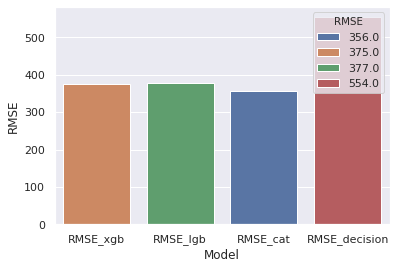

In [148]:
ax = sns.barplot(x="Model", y="RMSE", hue="RMSE",dodge=False, data=rmse_val)
sns.set()

###  <font color="orange"> Linear Regression

In [149]:
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


In [150]:
data = data.dropna(axis='index', how='any')

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245814 entries, 3 to 354367
Data columns (total 16 columns):
DateCrawled          245814 non-null object
Price                245814 non-null int64
VehicleType          245814 non-null object
RegistrationYear     245814 non-null int64
Gearbox              245814 non-null object
Power                245814 non-null int64
Model                245814 non-null object
Kilometer            245814 non-null int64
RegistrationMonth    245814 non-null int64
FuelType             245814 non-null object
Brand                245814 non-null object
NotRepaired          245814 non-null object
DateCreated          245814 non-null object
NumberOfPictures     245814 non-null int64
PostalCode           245814 non-null int64
LastSeen             245814 non-null object
dtypes: int64(7), object(9)
memory usage: 31.9+ MB


In [152]:
import random

In [153]:
# Тo avoid kernel crashes, I selected 100,000 rows from the full DataFrame.
data_new = data.sample(n=100000)
data_new

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
214659,2016-03-21 13:53:07,4300,wagon,2005,manual,80,focus,100000,9,petrol,ford,no,2016-03-21 00:00:00,0,27232,2016-04-06 18:19:09
25074,2016-03-16 19:57:33,1490,suv,1999,manual,105,other,150000,7,petrol,honda,no,2016-03-16 00:00:00,0,92318,2016-03-16 19:57:33
219102,2016-03-23 12:25:23,2990,sedan,2002,manual,75,beetle,90000,7,petrol,volkswagen,no,2016-03-23 00:00:00,0,60439,2016-04-06 09:45:33
295606,2016-03-09 00:38:00,3500,sedan,2001,manual,105,golf,150000,3,petrol,volkswagen,no,2016-03-08 00:00:00,0,72336,2016-04-06 23:45:02
346857,2016-04-02 23:46:05,12990,wagon,2006,auto,231,3er,150000,3,gasoline,bmw,no,2016-04-02 00:00:00,0,35083,2016-04-07 00:46:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269589,2016-03-19 09:54:40,9790,small,2012,manual,120,2_reihe,40000,11,petrol,peugeot,no,2016-03-19 00:00:00,0,20355,2016-04-06 10:15:48
304285,2016-03-22 13:56:37,11900,sedan,2005,auto,218,x_reihe,150000,7,gasoline,bmw,no,2016-03-22 00:00:00,0,24119,2016-04-06 02:46:37
193444,2016-03-30 17:46:04,3290,small,2008,manual,58,twingo,125000,2,petrol,renault,no,2016-03-30 00:00:00,0,47198,2016-04-07 08:44:35
22992,2016-03-07 18:52:04,99,wagon,1998,manual,115,v40,150000,4,petrol,volvo,no,2016-03-07 00:00:00,0,81249,2016-03-17 18:45:14


In [154]:
# I removed all unnecessary columns. Although the 'Model' and 'VehicleType' columns are large, and encoding them results in over 300 columns, I did not delete them because I consider them important features.
data_new=data_new.drop(['DateCrawled','DateCreated','NumberOfPictures','LastSeen','PostalCode'],axis=1)
data_new

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
214659,4300,wagon,2005,manual,80,focus,100000,9,petrol,ford,no
25074,1490,suv,1999,manual,105,other,150000,7,petrol,honda,no
219102,2990,sedan,2002,manual,75,beetle,90000,7,petrol,volkswagen,no
295606,3500,sedan,2001,manual,105,golf,150000,3,petrol,volkswagen,no
346857,12990,wagon,2006,auto,231,3er,150000,3,gasoline,bmw,no
...,...,...,...,...,...,...,...,...,...,...,...
269589,9790,small,2012,manual,120,2_reihe,40000,11,petrol,peugeot,no
304285,11900,sedan,2005,auto,218,x_reihe,150000,7,gasoline,bmw,no
193444,3290,small,2008,manual,58,twingo,125000,2,petrol,renault,no
22992,99,wagon,1998,manual,115,v40,150000,4,petrol,volvo,no


In [155]:
data_ohe = pd.get_dummies(data_new, drop_first=True)
data_ohe

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,...,Brand_seat,Brand_skoda,Brand_smart,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_yes
214659,4300,2005,80,100000,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25074,1490,1999,105,150000,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219102,2990,2002,75,90000,7,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
295606,3500,2001,105,150000,3,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
346857,12990,2006,231,150000,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269589,9790,2012,120,40000,11,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
304285,11900,2005,218,150000,7,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
193444,3290,2008,58,125000,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
22992,99,1998,115,150000,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [156]:
y_l = data_ohe['Price']
X_l = data_ohe.drop('Price', axis=1)

In [157]:
X_l

,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_seat,Brand_skoda,Brand_smart,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_yes
214659,2005,80,100000,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25074,1999,105,150000,7,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
219102,2002,75,90000,7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
295606,2001,105,150000,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
346857,2006,231,150000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269589,2012,120,40000,11,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
304285,2005,218,150000,7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
193444,2008,58,125000,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22992,1998,115,150000,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [158]:
# Split the dataset into training, validation, and test sets
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X_l, y_l, test_size=0.2, random_state=12345)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_train, y1_train, test_size=0.25, random_state=12345)

In [159]:
X1_train

,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_seat,Brand_skoda,Brand_smart,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_yes
307479,1998,90,125000,7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
299500,2001,218,125000,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269147,1999,105,125000,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90480,1996,136,150000,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231708,2002,360,150000,5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313081,2009,92,125000,4,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
263764,1999,60,125000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
249368,2002,333,150000,7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
251361,1997,54,90000,9,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
lg = LinearRegression()

In [162]:
%time
lg.fit(X1_train, y1_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10 µs


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
%time
y_pred = lg.predict(X1_valid)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.87 µs


In [164]:
print(mean_squared_error(y1_valid, y_pred) ** 0.5)

2740.7232737884465


#### To compare RMSE values for the 100,000-row sample of the DataFrame, I used the CatBoost library.

In [165]:
Cat_boost = CatBoostRegressor(iterations=200,loss_function='RMSE',task_type="CPU",learning_rate=1,depth=5,verbose=40)

In [166]:
%time
Cat_boost.fit(X1_train, y1_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.39 µs
0:	learn: 2723.4645130	total: 85.7ms	remaining: 17s
40:	learn: 1755.9053081	total: 2.33s	remaining: 9.04s
80:	learn: 1642.5037252	total: 4.65s	remaining: 6.83s
120:	learn: 1583.0402684	total: 6.88s	remaining: 4.5s
160:	learn: 1536.8738237	total: 9.21s	remaining: 2.23s
199:	learn: 1502.6564781	total: 11.4s	remaining: 0us


In [167]:
%time
y_pred_cat = Cat_boost.predict(X1_valid)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.63 µs


In [168]:
print(mean_squared_error(y1_valid, y_pred_cat) ** 0.5)

1726.1956592381275


#### Model evaluation on the test set

In [169]:
lg_test = LinearRegression()

In [170]:
%time
lg_test.fit(X1_train, y1_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.15 µs


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
%time
y_pred = lg.predict(X1_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10 µs


In [172]:
print(mean_squared_error(y1_test, y_pred) ** 0.5)

2729.467216268395


In [173]:
Cat_boost_test = CatBoostRegressor(iterations=200,loss_function='RMSE',task_type="CPU",learning_rate=1,depth=5,verbose=40)

In [174]:
%time
Cat_boost_test.fit(X1_train, y1_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs
0:	learn: 2723.4645130	total: 43.5ms	remaining: 8.66s
40:	learn: 1755.9053081	total: 2.28s	remaining: 8.84s
80:	learn: 1642.5037252	total: 4.61s	remaining: 6.77s
120:	learn: 1583.0402684	total: 6.84s	remaining: 4.46s
160:	learn: 1536.8738237	total: 9.07s	remaining: 2.2s
199:	learn: 1502.6564781	total: 11.2s	remaining: 0us


In [175]:
%time
y_pred_cat = Cat_boost_test.predict(X1_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.39 µs


In [176]:
print(mean_squared_error(y1_test, y_pred_cat) ** 0.5)

1722.5278243192017


# 3. Model Analysis

To measure the execution time of a code cell, I used %%time. Since the libraries have different hyperparameters, to compare the runtime of the models more or less objectively, I used the same values for the same hyperparameters: learning_rate = 1, max_depth = 5, n_estimators = 40.

When comparing "Training Time":
 - LightGBM was the fastest
 - XGBoost
 - CatBoost
 
When comparing "Prediction Speed":

 - CatBoost
 - LightGBM
 - XGBoost
Regarding metrics, the lowest (best) RMSE was achieved by CatBoost, followed by LightGBM, and lastly XGBoost.
For model tuning, I also tried using GridSearch for CatBoost and LightGBM to find the best hyperparameters. Since the process takes some time (especially for CatBoost), I did not pass many parameters.